<a href="https://colab.research.google.com/github/madnanshinwari/DeepLearning-work/blob/main/transfer_learning_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:05<00:00, 195MB/s]
100% 1.06G/1.06G [00:05<00:00, 200MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False, # FC layers excluded
    input_shape = (150,150,3) # vgg expect 224x224x3  customize the input size
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
conv_base.trainable = False

### Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

batch_size = 32

train_datagen  = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
test_datagen = ImageDataGenerator(rescale = 1./255) # on test data only apply normalization

train_generator  = train_datagen.flow_from_directory(
    '/content/train',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

### Model Training

In [ ]:
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 248ms/step - accuracy: 0.8302 - loss: 0.3857 - val_accuracy: 0.9002 - val_loss: 0.2295
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 198s 256ms/step - accuracy: 0.8921 - loss: 0.2465 - val_accuracy: 0.9188 - val_loss: 0.1949
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 256ms/step - accuracy: 0.9042 - loss: 0.2221 - val_accuracy: 0.9092 - val_loss: 0.2006
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 256ms/step - accuracy: 0.9138 - loss: 0.2035 - val_accuracy: 0.9186 - val_loss: 0.1949
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 258ms/step - accuracy: 0.9156 - loss: 0.1955 - val_accuracy: 0.9142 - val_loss: 0.2072
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 257ms/step - accuracy: 0.9212 - loss: 0.1930 - val_accuracy: 0.9200 - val_loss: 0.1881
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 191s 241ms/step - accuracy: 0.9238 - loss: 0.1779 - val_accuracy: 0.9182 - val_loss: 0.1872
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 240ms/step - accuracy: 0.9275 - loss: 0.16

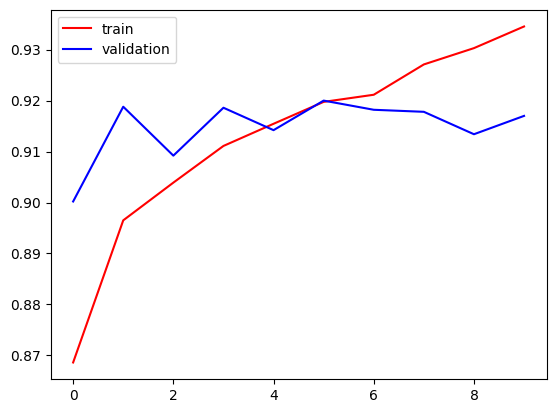

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

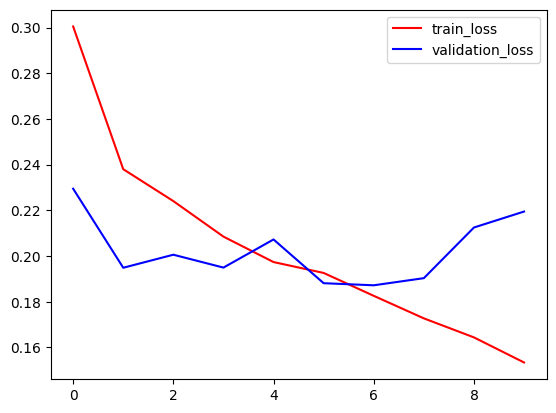

In [ ]:
plt.plot(history.history['loss'],color='red',label='train_loss')
plt.plot(history.history['val_loss'],color='blue',label='validation_loss')
plt.legend()
plt.show()